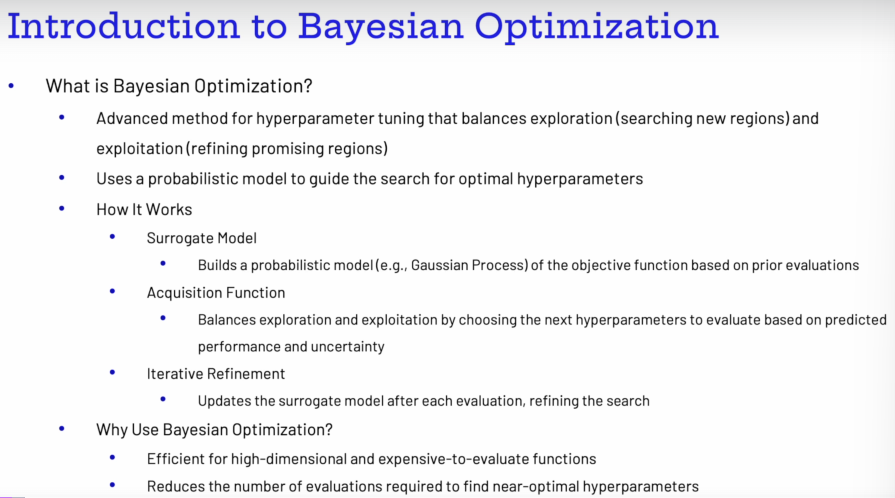
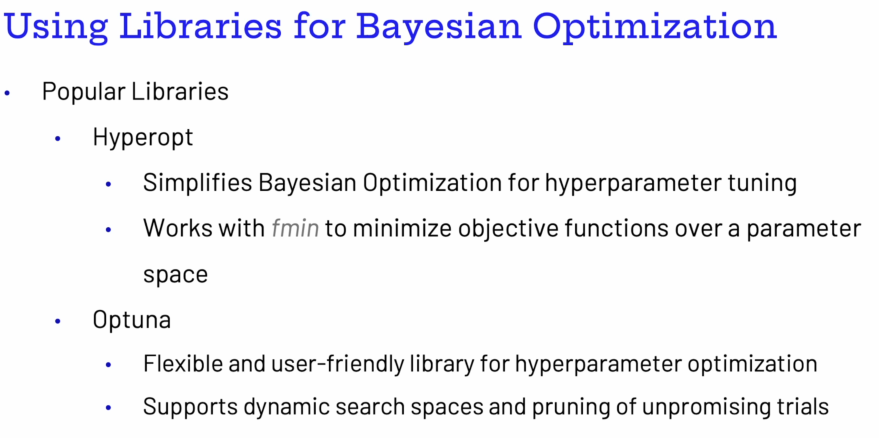
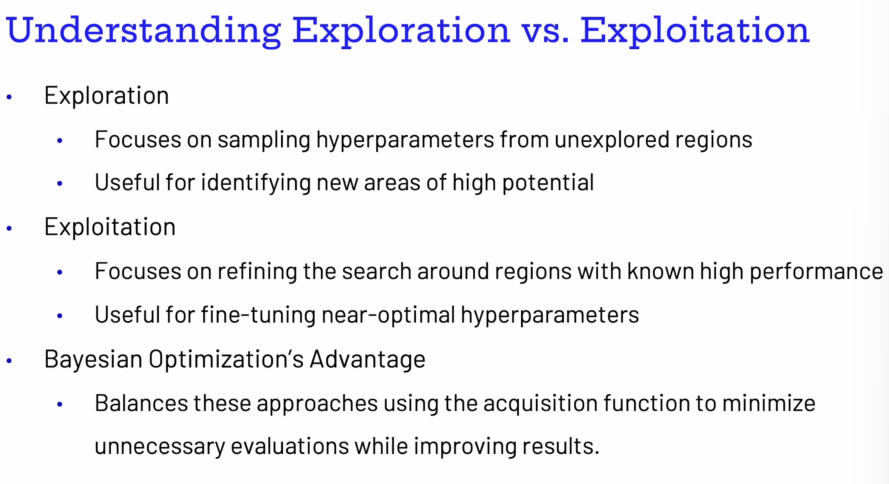

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [2]:
data = load_breast_cancer()
x,y = data.data , data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [3]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [4]:
baseline_model = XGBClassifier(eval_metric='logloss', random_State=42)
baseline_model.fit(x_train, y_train)

baseline_pred = baseline_model.predict(x_test)


e:\pythonAi\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:38:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "random_State" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [5]:
accuracy_score(y_test, baseline_pred)

0.956140350877193

In [6]:
import optuna

e:\pythonAi\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50,500),
        'max_depth': trial.suggest_int('max_depth', 1, 100),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-5, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 1.0, log=True)
    }
    model = XGBClassifier(eval_metric='logloss', random_state=42 , **params)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    return accuracy

In [10]:

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50   )


[I 2025-08-29 15:46:08,763] A new study created in memory with name: no-name-fe2e4848-382a-4c66-9fcd-291c546e0a82
[I 2025-08-29 15:46:09,079] Trial 0 finished with value: 0.6228070175438597 and parameters: {'n_estimators': 318, 'max_depth': 98, 'learning_rate': 1.737330146527774e-05, 'subsample': 0.5015820016569266, 'colsample_bytree': 0.17446654923923893, 'gamma': 3.3692751452620576e-05, 'reg_alpha': 0.034419555726383416, 'reg_lambda': 0.027550284117116314}. Best is trial 0 with value: 0.6228070175438597.
[I 2025-08-29 15:46:09,463] Trial 1 finished with value: 0.6228070175438597 and parameters: {'n_estimators': 438, 'max_depth': 43, 'learning_rate': 1.1537856593029498e-05, 'subsample': 0.9773520996443983, 'colsample_bytree': 0.46872537970531736, 'gamma': 0.23179531515575794, 'reg_alpha': 0.002934576622451042, 'reg_lambda': 0.13741659300809894}. Best is trial 0 with value: 0.6228070175438597.
[I 2025-08-29 15:46:09,615] Trial 2 finished with value: 0.9736842105263158 and parameters: {

In [13]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample':[0.6,0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

In [14]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200, ...], 'subsample': [0.6, 0.8, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'
